In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
regions = pd.read_csv('regions.txt',sep=';',header=0)

In [5]:
dt1 = pd.read_csv('yellow_tripdata_2016-05.csv', sep = ',',header=0)

In [6]:
dt1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [7]:
len(dt1)

11836853

In [8]:
dt=pd.DataFrame({'VendorID': dt1['VendorID'],
                 'tpep_pickup_datetime': dt1['tpep_pickup_datetime'],
                 'tpep_dropoff_datetime': dt1['tpep_dropoff_datetime'],
                'passenger_count': dt1['passenger_count'],
                'pickup_longitude': dt1['pickup_longitude'],
                'pickup_latitude': dt1['pickup_latitude'],
                'trip_distance': dt1['trip_distance']})# будем работать только с нужными данными

In [10]:
#изменение типа столбца с помощью функции apply
dt.tpep_pickup_datetime = dt.tpep_pickup_datetime.apply(pd.to_datetime)
dt.tpep_dropoff_datetime = dt.tpep_dropoff_datetime.apply(pd.to_datetime)

 Проведем фильтрацию: 
 
 удалим поездки с

нулевой длительностью
нулевым количеством пассажиров
нулевым расстоянием поездки по счётчику
координатами начала, не попадающими в прямоугольник Нью-Йорка

In [11]:
dt['delta']=dt['tpep_dropoff_datetime']-dt['tpep_pickup_datetime'] # длительность поездки
dt = dt.drop(dt[(dt.passenger_count == 0) | (dt.trip_distance == 0.0)|(dt.delta =='00:00:00')].index)
dt = dt[(dt['pickup_latitude']<40.91553)&
          (dt['pickup_latitude']>40.49612)&
          (dt['pickup_longitude']<-73.70001)&
          (dt['pickup_longitude']>-74.25559)]

Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.

In [12]:
biny=regions.south.unique()
biny.sort()
binx=regions.west.unique()
binx.sort()

In [13]:
dt['hour']=dt['tpep_pickup_datetime'].dt.hour#столбик часа отправления
dt['date_month']=dt['tpep_pickup_datetime'].dt.month#столбик номера месяца отправления
dt['date_day']=dt['tpep_pickup_datetime'].dt.day#столбик номера дня отправления

In [14]:
y = dt.pickup_latitude.values
x = dt.pickup_longitude.values
statistic,x_edge,y_edge,binnumber = stats.binned_statistic_2d(x, y, regions, 'count', bins=[binx[1:],biny[1:]])
#определяем область отправления

In [15]:
binnumber#номера регионов списком для нашей таблицы

array([1232, 1179, 1179, ..., 1126, 1231, 1360])

In [16]:
dt['area']=binnumber#столбик области отправления
dt['count']=1

In [17]:
dt['year']=dt['tpep_pickup_datetime'].dt.year#столбик номера года отправления

In [18]:
dt['day_hour'] = dt['tpep_pickup_datetime'].map(lambda x: x.strftime('%Y-%m-%d %H'))

In [19]:
dt.tail()

,VendorID,passenger_count,pickup_latitude,pickup_longitude,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,delta,hour,date_month,date_day,area,count,year,day_hour
11836837,2,2,40.774818,-73.947876,2016-06-01 00:00:24,2016-05-31 23:53:01,1.89,00:07:23,23,5,31,1383,1,2016,2016-05-31 23
11836838,2,1,40.646942,-73.789467,2016-06-01 00:19:36,2016-05-31 23:53:02,15.21,00:26:34,23,5,31,2067,1,2016,2016-05-31 23
11836839,2,1,40.719723,-74.008659,2016-05-31 23:59:07,2016-05-31 23:53:02,1.80,00:06:05,23,5,31,1126,1,2016,2016-05-31 23
11836840,2,1,40.758862,-73.981644,2016-06-01 00:05:47,2016-05-31 23:53:03,2.28,00:12:44,23,5,31,1231,1,2016,2016-05-31 23
11836841,1,1,40.586658,-73.948959,2016-05-19 03:31:24,2016-05-19 03:29:16,0.60,00:02:08,3,5,19,1360,1,2016,2016-05-19 03


In [53]:
all_periods=sorted(set(dt.day_hour.values))#выбираем уникальные часы-поездки в исходной таблице, соритруем их по возрастанию
k=all_periods[len(all_periods)-1]
p = pd.Period(k,freq='h')
p1=p+1#создаем нижнюю границу для формирования сетки
all_periods.append(str(p1)[-16:-3])#добавляем к списку новую нижнюю границу 

In [55]:
all_periods=pd.Series(all_periods)

In [66]:
all_periods=all_periods.apply(pd.to_datetime)
all_periods1=all_periods.view('int64') // pd.Timedelta(1, unit='s')# переводим список дат в формат int для агрегации

In [90]:
all_periods1[:5]#спискок всех дат поездок для агрегации

0    1462060800
1    1462064400
2    1462068000
3    1462071600
4    1462075200
dtype: int64

In [68]:
day_hour_data=dt.day_hour.apply(pd.to_datetime)
day_hour_data=pd.Series(day_hour_data)

In [69]:
day_hour_data1=day_hour_data.view('int64') // pd.Timedelta(1, unit='s')#метка день-час поездки для каждой поездки

In [70]:
x1 = dt.area.values#номера районов для каждой поездки
binx1=regions.region
s1 = pd.Series([2501])
binx1=binx1.append(s1)#список всех районов
time_zone,x_edge1,y_edge1,binnumber1 = stats.binned_statistic_2d(x1,day_hour_data1, None, 'count', bins=[binx1,all_periods1])

In [72]:
time_zone.shape#получили таблицу агрегированных данных день-час поездки-район города. 

(2500, 744)

In [88]:
time_zone_2016_05=pd.DataFrame(time_zone,index=binx1[:-1], columns = all_periods[:-1])
#запишем в таблицу для легкого прочтения

In [89]:
time_zone_2016_05.head()

,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
time_zone_2016_05.to_csv('time_zone_2016_05.csv')

Координаты Empire State Building (40.74846, -73.98591).Это квадрат с индексом 1229, номером региона 1230.
Построим график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.

In [99]:
Empire_State_Building=time_zone_2016_05[time_zone_2016_05.index==1230]
Empire_State_Building

,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
1230,881.0,713.0,533.0,418.0,353.0,151.0,147.0,158.0,256.0,340.0,...,1009.0,814.0,748.0,879.0,1093.0,1094.0,997.0,1099.0,874.0,608.0


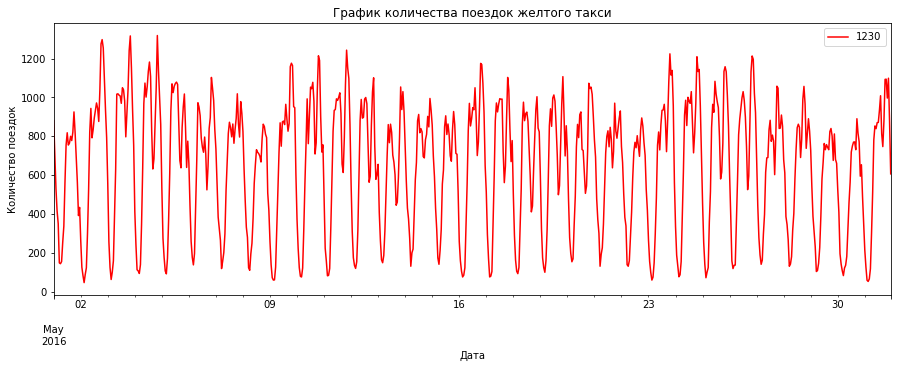

In [101]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
    
Empire_State_Building.T.plot(kind="line",color="r",ax = fig.add_subplot(111),figsize = (15,5)).legend()
plt.title(u'График количества поездок желтого такси')
plt.xlabel(u'Дата')
plt.ylabel(u'Количество поездок')
plt.show()

Посчитаем, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.

In [110]:
null_cells=time_zone[time_zone==0]
null_cells.shape# вот столько нулей в нашей конечной таблице агрегированных данных

(1718238,)